In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data0 = pd.read_csv('complete_dataset_v3.csv')
data0.head()

,Have_IP,Have_At,URL_Length,Sub_domains,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [3]:
data0.shape

(20000, 9)

In [4]:
data0.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'Sub_domains', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'Label'],
      dtype='object')

In [5]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        20000 non-null  int64
 1   Have_At        20000 non-null  int64
 2   URL_Length     20000 non-null  int64
 3   Sub_domains    20000 non-null  int64
 4   Redirection    20000 non-null  int64
 5   https_Domain   20000 non-null  int64
 6   TinyURL        20000 non-null  int64
 7   Prefix/Suffix  20000 non-null  int64
 8   Label          20000 non-null  int64
dtypes: int64(9)
memory usage: 1.4 MB


In [6]:
data0.describe()

,Have_IP,Have_At,URL_Length,Sub_domains,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.004300,0.027850,0.705150,0.222200,0.012950,0.000050,0.100700,0.130200,0.500000
std,0.065435,0.164547,0.455987,0.415735,0.113062,0.007071,0.300939,0.336532,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Shuffling the data
data = data0.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,Sub_domains,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [8]:
#Splitting the data
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((20000, 8), (20000,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((16000, 8), (4000, 8))

In [10]:
#Using Random forrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [11]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
y_train_forest[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.875
Random forest: Accuracy on test Data: 0.876


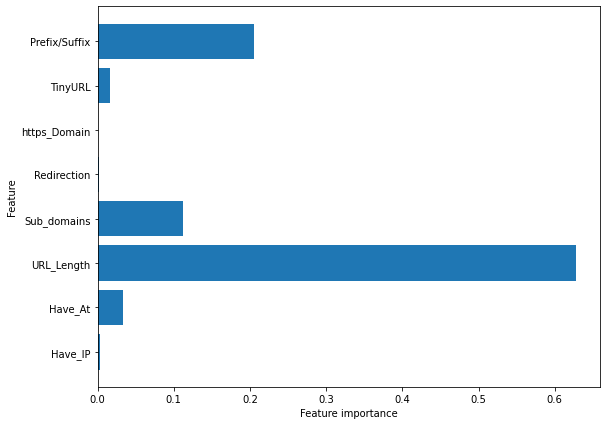

In [13]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [15]:
import joblib

In [16]:
joblib.dump(forest, 'RandomForrest_Model.pkl')

['RandomForrest_Model.pkl']